## Libraries

In [42]:
# Determinadas
import numpy as np
import pandas
import matplotlib.pyplot as plt
import copy

# Procesamiento de imágenes
import numpy as np
import cv2

from sklearn.datasets import make_blobs

# <br><br><br><br><br>======= Part 1 =======

### ----- 1.1) Download the Girl Face image and plot a histogram of the grey levels it contains. (Try plotting a histogram of another grey scale image and comparing the difference)

### Histogram function

In [43]:
def createHistogramArray(img):
    # Sacar la forma de la imagen.
    nrows, ncols = img.shape

    # Crear arreglo vacío de ceros.
    histValues = np.zeros(256)

    # Contar pixeles.
    for i in range(nrows):
        for j in range(ncols):
            histValues[img[i,j]] = histValues[img[i,j]] + 1
            
    return histValues

### Load Data (Girl Face image)

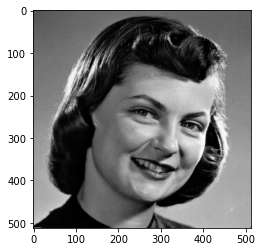

In [44]:
# Cargar imagen.
img = cv2.imread('Datasets/ImgA.png')
# img = cv2.imread('Datasets/ImgB.jpg')

# Imagen a escala de grises.
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Mostrar imagen.
plt.figure()
plt.imshow(img, cmap="gray")
plt.show()

### Get values (Girl Face image)

In [45]:
# Obtener arreglo del histograma.
histValues = createHistogramArray(img)

### Show histogram (Girl Face image)

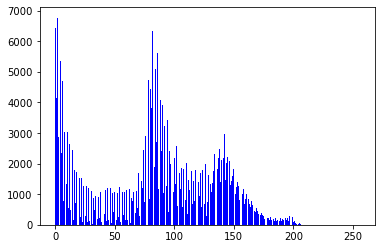

In [46]:
plt.bar(range(0,len(histValues)), histValues, color="blue")
plt.show()

### Load data (Other grayscale image)

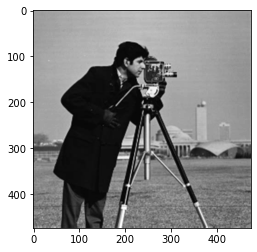

In [47]:
# Cargar imagen.
imgO = cv2.imread('Datasets/ImgA.jpg')

# Imagen a escala de grises.
imgO = cv2.cvtColor(imgO, cv2.COLOR_BGR2GRAY)

# Mostrar imagen.
plt.figure()
plt.imshow(imgO, cmap="gray")
plt.show()

### Get values (Other grayscale image)

In [48]:
# Obtener arreglo del histograma.
histValuesO = createHistogramArray(imgO)

### Show histogram (Other grayscale image)

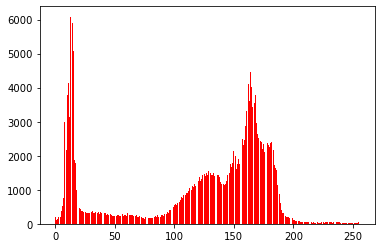

In [49]:
plt.bar(range(0,len(histValuesO)), histValuesO, color="red")
plt.show()

### Histogram comparison

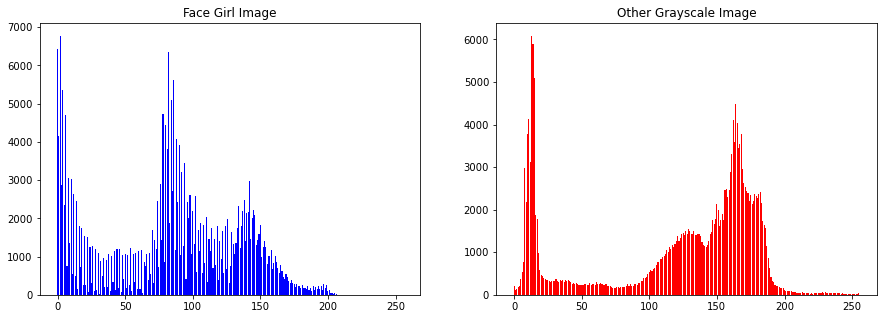

In [50]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.bar(range(0,len(histValues)), histValues, color="blue")
plt.title("Face Girl Image")
plt.subplot(1,2,2)
plt.bar(range(0,len(histValuesO)), histValuesO, color="red")
plt.title("Other Grayscale Image")
plt.show()

### <br><br><br><br><br><br><br><br><br><br><br><br><br>----- 1.2) Write a short program to threshold the image and try to identify a good threshold by trial and error. Create a ground truth segmentation.

### Threshold function

In [51]:
def getThreshold(img, minFactor, maxFactor):
    # Obtener forma de la imagen.
    nrows, ncols = img.shape
    
    # Crear nueva matriz.
    newImg = np.zeros_like(img)
    
    # Umbralizado rápido.
    down = img >= minFactor
    up = img <= maxFactor
    mask = down & up
    newImg[mask] = 1
    
    # Umbralizado lento.
#     for i in range(nrows):
#         for j in range(ncols):
#             if( img[i,j] >= minFactor and img[i,j] <= maxFactor ):
#                 newImg[i,j] = 1
#             else:
#                 newImg[i,j] = 0
                
    return newImg    

### Show threshold

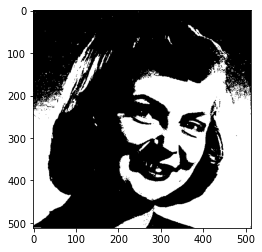

In [52]:
# Umbralizar imagen.
thresholdedImg = getThreshold(img.copy(), 105, 255)

# Mostrar imagen.
plt.figure()
plt.imshow(thresholdedImg, cmap="gray")
plt.show()

### Show ground truth segmentation

<Figure size 432x288 with 0 Axes>

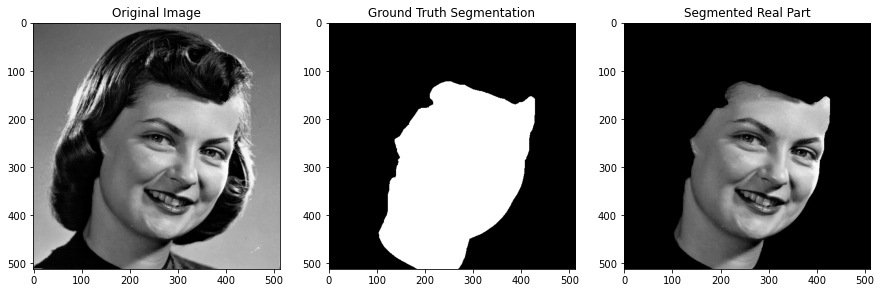

In [53]:
# Cargar imagen.
gt = cv2.imread('Datasets/Img_GT.png')

# Imagen a escala de grises.
gt = cv2.cvtColor(gt, cv2.COLOR_BGR2GRAY)

# Binarizar.
gt[gt > 0] = 1

# Segmentación real de la imagen usando el ground truth.
img_With_GT = np.zeros_like(img)
img_With_GT[gt == 1] = img[gt == 1]

# Mostrar imagen.
plt.figure()
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.imshow(img, cmap="gray")
plt.title("Original Image")
plt.subplot(1,3,2)
plt.imshow(gt, cmap="gray")
plt.title("Ground Truth Segmentation")
plt.subplot(1,3,3)
plt.imshow(img_With_GT, cmap="gray")
plt.title("Segmented Real Part")
plt.show()

### <br><br><br><br><br><br><br><br><br><br><br><br><br>----- 1.3) Use your ground truth segmentation to plot an ROC curve for your thresholding algorithm. What threshold does the ROC curve suggest? You may have to implement an algorithm to find the point closest to a desired Operating Point. How does it compare to your trial and error estimate?

### Precision function

In [54]:
def getPrecision(gt, img):
    # Obtener forma de la imagen.
    nrows, ncols = img.shape
    
    # Total de pixeles que deben ser correctos.
    total = np.sum(gt)
    
    # Contadores.
    tp = 0 # True positives.
    fp = 0 # False positives.
    
    for i in range(nrows):
        for j in range(ncols):
            if img[i,j] == 1 and gt[i,j] == 1:
                tp += 1
            elif img[i,j] == 1 and gt[i,j] == 0:
                fp += 1
                
    # Precision.
    precision = tp / (tp+fp)
    
    return precision

### Recall function

In [55]:
def getRecall(gt, img):
    # Obtener forma de la imagen.
    nrows, ncols = img.shape
    
    # Total de pixeles que deben ser correctos.
    total = np.sum(gt)
    
    # Contadores.
    tp = 0 # True positives.
    fn = 0 # False negatives.
    
    for i in range(nrows):
        for j in range(ncols):
            if img[i,j] == 1 and gt[i,j] == 1:
                tp += 1
            elif img[i,j] == 0 and gt[i,j] == 1:
                fn += 1
                
    # Recall.
    recall = tp / (tp+fn)
    
    return recall

### FPR function

In [56]:
def fpr(ft, img):
    # Obtener forma de la imagen.
    nrows, ncols = img.shape
    
    # Contadores.
    tn = 0 # True negatives.
    fp = 0 # False positives.
    
    for i in range(nrows):
        for j in range(ncols):
            if img[i,j] == 1 and gt[i,j] == 0:
                fp += 1
            elif img[i,j] == 0 and gt[i,j] == 0:
                tn += 1
                
    # False positive rate.
    fpr = fp / (fp+tn)
    
    return fpr

### Accuracy function

In [57]:
def getAccuracy(gt, img):
    # Obtener forma de la imagen.
    nrows, ncols = img.shape
    
    # Total de pixeles que deben ser correctos.
    total = np.sum(gt)
    
    # Contadores.
    tp = 0 # True positives.
    fp = 0 # False positives.
    tn = 0 # True negatives.
    fn = 0 # False negatives.
    
    for i in range(nrows):
        for j in range(ncols):
            if img[i,j] == 1 and gt[i,j] == 1:
                tp += 1
            elif img[i,j] == 1 and gt[i,j] == 0:
                fp += 1
            elif img[i,j] == 0 and gt[i,j] == 0:
                tn += 1
            elif img[i,j] == 0 and gt[i,j] == 1:
                fn += 1

                
    # Accuracy.
    accuracy = (tp + tn) / (tp+fp+tn+fn)
    
    return accuracy

### Create ROC curve

In [58]:
# Creación de matrices y arreglos a utilizar.
thresholds = np.arange(0, 255)
true_positive_rates = np.zeros(len(thresholds))
false_positive_rates = np.zeros(len(thresholds))

# Variables a utilizar.
recommended_point = [1,1]
recommended_threshold = 0

for i, threshold in enumerate(thresholds):
    # Obtener umbralización.
    thresholdedImage = getThreshold(img, threshold, 255)
    
    # Obtener recall.
    true_positive_rates[i] = getRecall(gt, thresholdedImage)
    
    # Obtener Fpr.
    false_positive_rates[i] = fpr(gt, thresholdedImage)
    
    if abs(true_positive_rates[i] - false_positive_rates[i]) > abs(recommended_point[0] - recommended_point[1]):
        recommended_point = (true_positive_rates[i], false_positive_rates[i])
        recommended_threshold = threshold

### Plot ROC curve

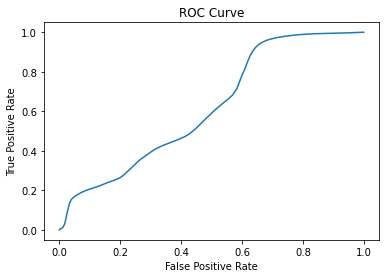

In [59]:
plt.figure()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.plot(false_positive_rates, true_positive_rates)
plt.show()

### ROC curve suggestion

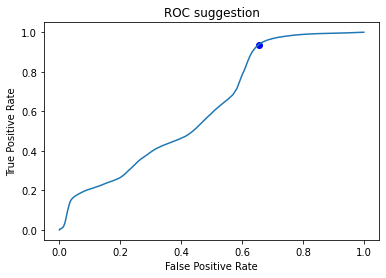

Recommended threshold by ROC curve =  41


In [60]:
plt.figure()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC suggestion")
plt.plot(recommended_point[1], recommended_point[0], 'bo')
plt.plot(false_positive_rates, true_positive_rates)
plt.show()

print('Recommended threshold by ROC curve = ', recommended_threshold)

### ROC Recommended threshold value = 41

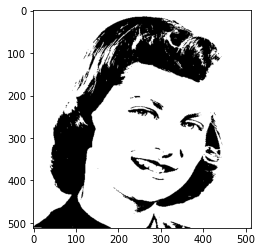

Precision 0.41126767754122634
Recall 0.937656411868096


In [61]:
plt.figure()
plt.imshow(getThreshold(img.copy(), recommended_threshold, 255), cmap='gray')
plt.show()

precision = getPrecision(gt, getThreshold(img.copy(), recommended_threshold, 255))
recall = getRecall(gt, getThreshold(img.copy(), recommended_threshold, 255))

print('Precision', precision)
print('Recall', recall)

### Trial and error Threshold VS ROC curve Threshold

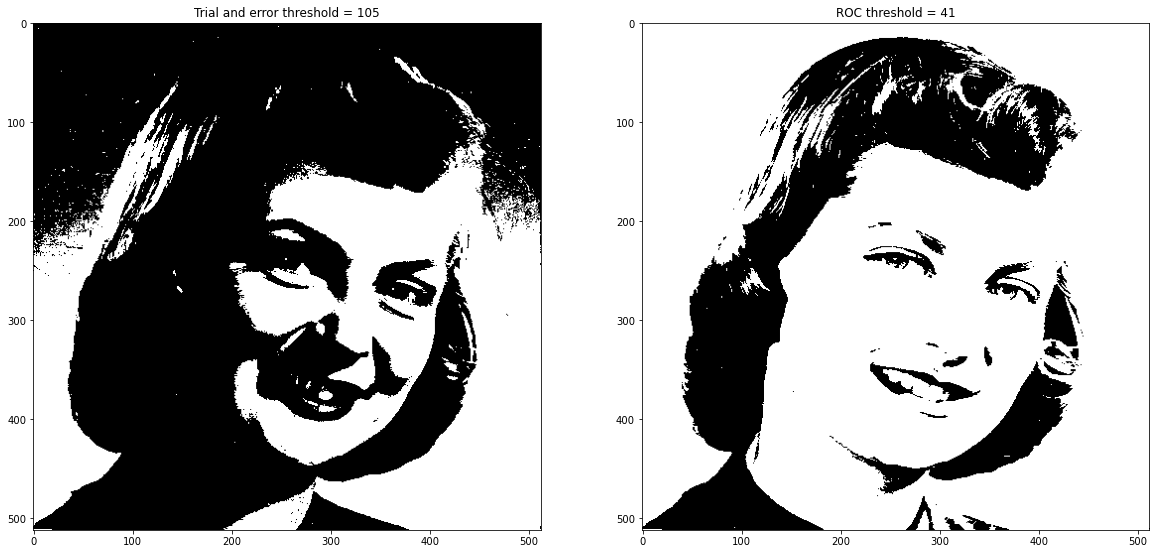

Precision trial and error 0.38661941792171145
Recall trial and error 0.4114606976987813
Precision ROC curve 0.41126767754122634
Recall ROC curve 0.937656411868096


In [62]:
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.title('Trial and error threshold = 105')
plt.imshow(getThreshold(img.copy(), 105, 255), cmap='gray')
plt.subplot(1,2,2)
plt.title('ROC threshold = 41')
plt.imshow(getThreshold(img.copy(), recommended_threshold, 255), cmap='gray')
plt.show()

precision_te = getPrecision(gt, getThreshold(img.copy(), 105, 255))
recall_te = getRecall(gt, getThreshold(img.copy(), 105, 255))

precision_roc = getPrecision(gt, getThreshold(img.copy(), recommended_threshold, 255))
recall_roc = getRecall(gt, getThreshold(img.copy(), recommended_threshold, 255))

print('Precision trial and error', precision_te)
print('Recall trial and error', recall_te)

print('Precision ROC curve', precision_roc)
print('Recall ROC curve', recall_roc)

# <br><br><br><br><br><br><br><br><br><br><br><br><br>======= Part 2 =======

### ----- 2.1) Implement a region growing algorithm and compare its performance at segmenting the face in the image above with the performance of the thresholding algorithm. Show the seeds you chose.


### Region growing function

In [63]:
def distance(a, b):
    return abs(int(a)-int(b))

In [64]:
def regionGrow(img, img_G, tolerance, seedStack, grayValue):
    # Obtener la forma de la imagen.
    nrows, ncols = img.shape
    
    while len(seedStack) != 0:
        # Obtener la semilla.
        seed = seedStack.pop()
    
        # Obtener 'x' y 'y' de la semilla.
        x = seed[0]
        y = seed[1]

        # Marcar el punto de la semilla.
        img_G[x,y] = 1
        
        # Checar si se puede conquistar el píxel de arriba.
        if( y+1 < nrows and img_G[x,y+1] == 0 and distance(grayValue, img[x,y+1]) <= tolerance):
            seedStack.append([x,y+1])
        # Checar si se puede conquistar el píxel de abajo.
        if( y-1 >= 0 and img_G[x,y-1] == 0 and distance(grayValue, img[x,y-1]) <= tolerance):
            seedStack.append([x,y-1])
        # Checar si se puede conquistar el píxel de la derecha.
        if( x+1 < ncols and img_G[x+1,y] == 0 and distance(grayValue, img[x+1,y]) <= tolerance):
            seedStack.append([x+1,y])
        # Checar si se puede conquistar el píxel de la izquierda.
        if( x-1 >= 0 and img_G[x-1,y] == 0 and distance(grayValue, img[x-1,y]) <= tolerance):
            seedStack.append([x-1,y])
            
    return img_G

### Generate images with the growing region algorithm

In [65]:
# Crear semilla.
seed = [250,150]

# Imprimir semilla utilizada.
print("La semilla usada fue: [" + str(seed[0]) + ", " + str(seed[1]) + "]")

# Stack de semillas.
seedStack = []
seedStack.append(seed)

# Crear nueva imagen totalmente negra.
img_G = np.zeros_like(img)

# Lista de imágenes de resultados.
img_GR = []

# Tolerancias utilizadas
tolerances = [10, 20, 25, 30, 35, 40]

# Valor de gris.
grayValue = img[seed[0], seed[1]]

# Agregar imágenes de resultados.
img_GR.append( regionGrow(img, copy.deepcopy(img_G), tolerances[0], seedStack.copy(), grayValue) )
img_GR.append( regionGrow(img, copy.deepcopy(img_G), tolerances[1], seedStack.copy(), grayValue) )
img_GR.append( regionGrow(img, copy.deepcopy(img_G), tolerances[2], seedStack.copy(), grayValue) )
img_GR.append( regionGrow(img, copy.deepcopy(img_G), tolerances[3], seedStack.copy(), grayValue) )
img_GR.append( regionGrow(img, copy.deepcopy(img_G), tolerances[4], seedStack.copy(), grayValue) )
img_GR.append( regionGrow(img, copy.deepcopy(img_G), tolerances[5], seedStack.copy(), grayValue) )

La semilla usada fue: [250, 150]


### Show growth regions

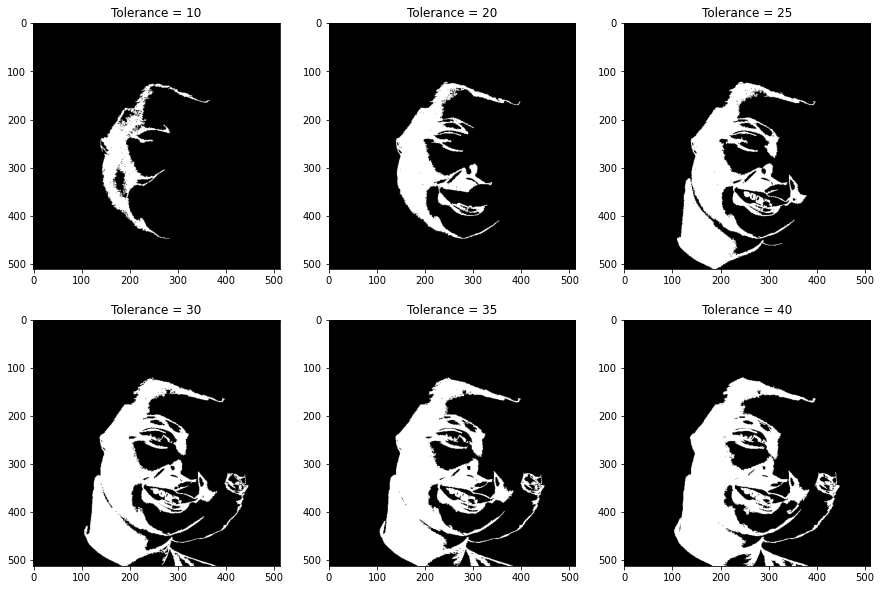

In [66]:
# Mostrar imágenes.              
plt.figure(figsize=(15,10))
plt.subplot(2,3,1)
plt.imshow(img_GR[0], cmap="gray")
plt.title("Tolerance = 10")
plt.subplot(2,3,2)
plt.imshow(img_GR[1], cmap="gray")
plt.title("Tolerance = 20")
plt.subplot(2,3,3)
plt.imshow(img_GR[2], cmap="gray")
plt.title("Tolerance = 25")
plt.subplot(2,3,4)
plt.imshow(img_GR[3], cmap="gray")
plt.title("Tolerance = 30")
plt.subplot(2,3,5)
plt.imshow(img_GR[4], cmap="gray")
plt.title("Tolerance = 35")
plt.subplot(2,3,6)
plt.imshow(img_GR[5], cmap="gray")
plt.title("Tolerance = 40")
plt.show()

### Performance

### Threshold performance

In [67]:
precision = getPrecision(gt, getThreshold(img.copy(), recommended_threshold, 255))
recall = getRecall(gt, getThreshold(img.copy(), recommended_threshold, 255))
accuracy = getAccuracy(gt, getThreshold(img.copy(), recommended_threshold, 255))

print("Precision = " + str(precision) + ", Recall = " + str(recall) + ", Accuracy = " + str(accuracy))

Precision = 0.41126767754122634, Recall = 0.937656411868096, Accuracy = 0.5396766662597656


### Ground truth performace

In [68]:
for i, tolerance, img_gr in zip(range(6), tolerances, img_GR):
    precision = getPrecision(gt, img_GR[i])
    recall = getRecall(gt, img_GR[i])
    accuracy = getAccuracy(gt, img_GR[i])

    print("Precision = " + str(precision) + ", Recall = " + str(recall) + ", Accuracy = " + str(accuracy))

Precision = 0.9994505063191773, Recall = 0.14819988127247966, Accuracy = 0.7208175659179688
Precision = 0.9985383259533124, Recall = 0.27036118774080153, Accuracy = 0.7607498168945312
Precision = 0.9971249148823484, Recall = 0.46020882075636416, Accuracy = 0.822662353515625
Precision = 0.9487073377910396, Recall = 0.5070130716671905, Accuracy = 0.8294525146484375
Precision = 0.9448355382934822, Recall = 0.5436672835841743, Accuracy = 0.8400459289550781
Precision = 0.9383245936514453, Recall = 0.5852801154683335, Accuracy = 0.8514785766601562
